In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Load and preprocess data (as before)
df = pd.read_csv('Housing - Housing.csv')
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


C:\Users\karthik krishna d v\AppData\Local\Temp\ipykernel_26392\2836159225.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


In [9]:
# Split the data into training and testing sets for multiple regression
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=70)

In [10]:
# Function to calculate metrics
def evaluate_model(y_true, y_pred, X_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R²
    n = len(y_true)  # Number of samples
    k = X_features.shape[1]  # Number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Adjusted R²': adj_r2
    }

In [11]:
# 1. Single-Feature Model (Area)
lr_single = LinearRegression()
lr_single.fit(X_train[['area']], y_train)
y_pred_single = lr_single.predict(X_test[['area']])
metrics_single = evaluate_model(y_test, y_pred_single, X_train[['area']])

In [12]:
# 2. Multiple-Feature Model
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)
metrics_multi = evaluate_model(y_test, y_pred_multi, X_train)

In [13]:
# 3. Regularized Models (Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
metrics_ridge = evaluate_model(y_test, y_pred_ridge, pd.DataFrame(X_train_scaled))

In [15]:
# Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
metrics_lasso = evaluate_model(y_test, y_pred_lasso, pd.DataFrame(X_train_scaled))


In [16]:
# Print results
def print_metrics(metrics, model_name):
    print(f"\n{model_name}:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}" if key in ['R²', 'Adjusted R²'] else f"{key}: {value:,.2f}")

print_metrics(metrics_single, "Single-Feature (Area)")
print_metrics(metrics_multi, "Multiple-Feature")
print_metrics(metrics_ridge, "Ridge Regression")
print_metrics(metrics_lasso, "Lasso Regression")


Single-Feature (Area):
MSE: 2,574,595,014,383.65
RMSE: 1,604,554.46
MAE: 1,205,725.33
R²: 0.2648
Adjusted R²: 0.2495

Multiple-Feature:
MSE: 876,307,034,468.61
RMSE: 936,112.73
MAE: 757,364.44
R²: 0.7498
Adjusted R²: 0.6594

Ridge Regression:
MSE: 876,373,565,068.78
RMSE: 936,148.26
MAE: 757,456.03
R²: 0.7498
Adjusted R²: 0.6594

Lasso Regression:
MSE: 876,306,690,051.90
RMSE: 936,112.54
MAE: 757,364.26
R²: 0.7498
Adjusted R²: 0.6594


In [17]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale features (critical for polynomial regression)
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Train model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_scaled, y_train)
y_pred_poly = poly_reg.predict(X_test_poly_scaled)

# Evaluate
metrics_poly = evaluate_model(y_test, y_pred_poly, pd.DataFrame(X_train_poly_scaled))
print("Polynomial Regression:")
for key, value in metrics_poly.items():
    print(f"{key}: {value:.4f}" if key in ['R²', 'Adjusted R²'] else f"{key}: {value:,.2f}")

Polynomial Regression:
MSE: 1,300,191,768,217.60
RMSE: 1,140,259.52
MAE: 815,491.74
R²: 0.6287
Adjusted R²: 1.3308


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train model
rf = RandomForestRegressor(n_estimators=100, random_state=70)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
metrics_rf = evaluate_model(y_test, y_pred_rf, X_train)

print("\nRandom Forest Regression:")
for key, value in metrics_rf.items():
    print(f"{key}: {value:.4f}" if key in ['R²', 'Adjusted R²'] else f"{key}: {value:,.2f}")

#saving the model
import joblib
joblib.dump(rf, 'random_forest_model.pkl')
# Load the model (for demonstration purposes)
rf_loaded = joblib.load('random_forest_model.pkl')
# Predict using the loaded model
y_pred_loaded = rf_loaded.predict(X_test)
# Evaluate the loaded model
metrics_loaded = evaluate_model(y_test, y_pred_loaded, X_train)
print("\nLoaded Random Forest Regression Model:")
for key, value in metrics_loaded.items():
    print(f"{key}: {value:.4f}" if key in ['R²', 'Adjusted R²'] else f"{key}: {value:,.2f}")
# Save the metrics to a CSV file
metrics_df = pd.DataFrame({
    'Model': ['Single-Feature (Area)', 'Multiple-Feature', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression', 'Random Forest Regression'],
    'MSE': [metrics_single['MSE'], metrics_multi['MSE'], metrics_ridge['MSE'], metrics_lasso['MSE'], metrics_poly['MSE'], metrics_rf['MSE']],
    'RMSE': [metrics_single['RMSE'], metrics_multi['RMSE'], metrics_ridge['RMSE'], metrics_lasso['RMSE'], metrics_poly['RMSE'], metrics_rf['RMSE']],
    'MAE': [metrics_single['MAE'], metrics_multi['MAE'], metrics_ridge['MAE'], metrics_lasso['MAE'], metrics_poly['MAE'], metrics_rf['MAE']],
    'R²': [metrics_single['R²'], metrics_multi['R²'], metrics_ridge['R²'], metrics_lasso['R²'], metrics_poly['R²'], metrics_rf['R²']],
    'Adjusted R²': [metrics_single['Adjusted R²'], metrics_multi['Adjusted R²'], metrics_ridge['Adjusted R²'], metrics_lasso['Adjusted R²'], metrics_poly['Adjusted R²'], metrics_rf['Adjusted R²']]
})
metrics_df.to_csv('model_metrics.csv', index=False)
# Save the preprocessed data for future use
df.to_csv('preprocessed_housing_data.csv', index=False)


Random Forest Regression:
MSE: 853,836,849,172.09
RMSE: 924,032.93
MAE: 702,105.80
R²: 0.7562
Adjusted R²: 0.6681

Loaded Random Forest Regression Model:
MSE: 853,836,849,172.09
RMSE: 924,032.93
MAE: 702,105.80
R²: 0.7562
Adjusted R²: 0.6681


In [19]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=70)
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test)
metrics_gb = evaluate_model(y_test, y_pred_gb, X_train)

print("\nGradient Boosting Regression:")
for key, value in metrics_gb.items():
    print(f"{key}: {value:.4f}" if key in ['R²', 'Adjusted R²'] else f"{key}: {value:,.2f}")


Gradient Boosting Regression:
MSE: 889,581,847,840.14
RMSE: 943,176.47
MAE: 783,566.18
R²: 0.7460
Adjusted R²: 0.6543


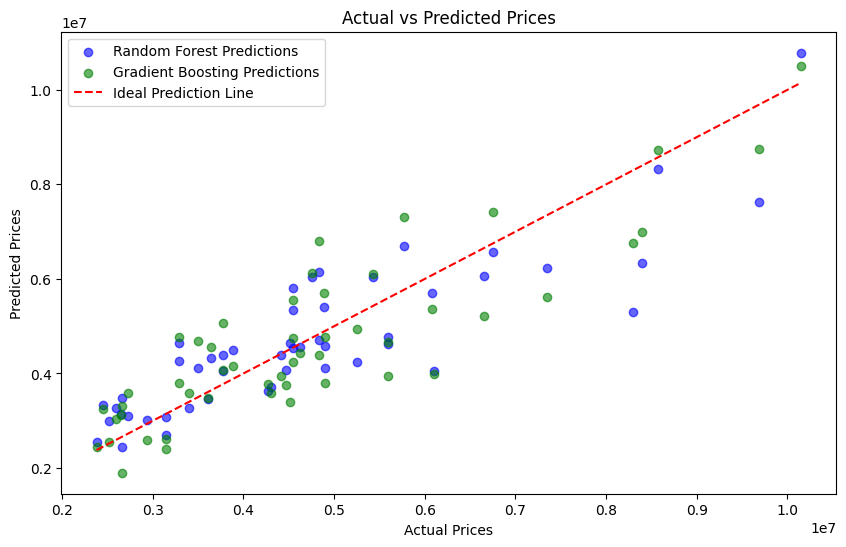

In [15]:
#compare with actual values and predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest Predictions', alpha=0.6)
plt.scatter(y_test, y_pred_gb, color='green', label='Gradient Boosting Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()



Predictions for New Data:
House 1: Predicted Price = 11717137.60
House 2: Predicted Price = 10672818.80


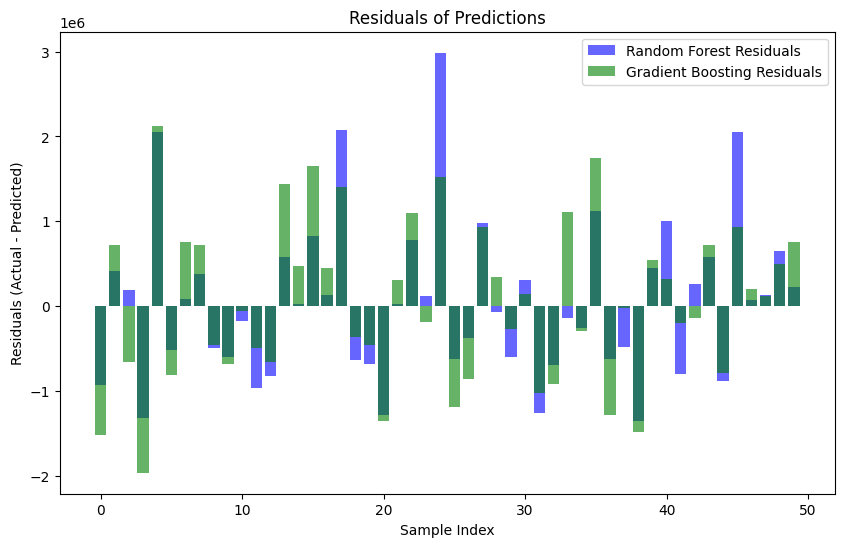

In [ ]:
import matplotlib.pyplot as plt
#taking first two rows of the dataset for new predictions
new_data = pd.DataFrame({
    'area': [7420, 8960],
    'bedrooms': [4, 4],
    'bathrooms': [2, 4],
    'stories': [3, 4],
    'mainroad': [1, 1],
    'guestroom': [0, 0],
    'basement': [0, 0],
    'hotwaterheating': [0, 0],
    'airconditioning': [1, 1],
    'parking': [2, 3],
    'prefarea': [1, 0],
    'furnishingstatus_furnished': [1, 1],
    'furnishingstatus_semi-furnished': [0, 0],
    'furnishingstatus_unfurnished': [0, 0]  # Add missing column
})



# Ensure the column order matches X_train
new_data = new_data[X_train.columns]

# Predict using the loaded model (no scaling needed for Random Forest)
y_pred_new = rf_loaded.predict(new_data)

# Display the predictions
print("\nPredictions for New Data:")
for i, pred in enumerate(y_pred_new):
    print(f"House {i+1}: Predicted Price = {pred:.2f}")

# ploting difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test - y_pred_rf, color='blue', alpha=0.6, label='Random Forest Residuals')
plt.bar(range(len(y_test)), y_test - y_pred_gb, color='green', alpha=0.6, label='Gradient Boosting Residuals')
plt.xlabel('Sample Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()

